<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Capstone-Design/blob/main/1209_00_groq_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Groq API](https://wikidocs.net/259655)**

- https://console.groq.com/playground

### **HuggingFace Endpoint Embedding**
- **HuggingFaceEndpointEmbeddings 는 내부적으로 InferenceClient를 사용하여 임베딩을 계산한다는 점에서 HuggingFaceEndpoint가 LLM에서 수행하는 것과 매우 유사**



In [ ]:
# LangChain과 Hugging Face의 모델을 연동하여 사용할 수 있도록 지원하는 패키지
# Hugging Face의 Transformer 모델이나 Inference API를 LangChain에서 쉽게 사용
!pip install langchain_huggingface --quiet

# LangChain의 공식 커뮤니티 플러그인과 확장 기능을 제공하는 패키지
# 다양한 LLM(대형 언어 모델), 데이터베이스, API와의 통합을 지원
!pip install langchain-community --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00


## Document는 LangChain에서 구조화된 텍스트 데이터를 관리하는 기본 단위

### 1. langchain_core.documents 모듈
- langchain_core는 LangChain의 핵심 모듈로, 기본적인 데이터 구조와 인터페이스를 제공
- langchain_core.documents는 문서를 다루는 기능을 제공하는 서브 모듈
> - LangChain에서 문서는 일반적으로 LLM(대형 언어 모델)과의 상호작용을 위한 텍스트 단위로 사용됩니다.

### 2. Document 클래스
- Document는 LangChain에서 사용되는 텍스트 문서 객체를 정의하는 클래스
> - 텍스트 데이터 + 메타데이터를 포함
> - 주로 텍스트 분할(text splitting), 임베딩(embedding), 검색(retrieval), 문서 기반 질의응답(QA) 등에 사용

In [ ]:
from langchain_core.documents import Document

# Document 객체 생성
doc = Document(
    page_content="LangChain은 AI 기반 애플리케이션을 구축하는 강력한 프레임워크입니다.",
    metadata={"source": "블로그", "author": "AI 전문가"}
)

# 내용 출력
print(doc.page_content)  # "LangChain은 AI 기반 애플리케이션을 구축하는 강력한 프레임워크입니다."
print(doc.metadata)      # {'source': '블로그', 'author': 'AI 전문가'}


LangChain은 AI 기반 애플리케이션을 구축하는 강력한 프레임워크입니다.
{'source': '블로그', 'author': 'AI 전문가'}


In [ ]:
texts = [
    "안녕, 만나서 반가워.",
    "LangChain simplifies the process of building applications with large language models",
    "랭체인 한국어 튜토리얼은 LangChain의 공식 문서, cookbook 및 다양한 실용 예제를 바탕으로 하여 사용자가 LangChain을 더 쉽고 효과적으로 활용할 수 있도록 구성되어 있습니다. ",
    "LangChain은 초거대 언어모델로 애플리케이션을 구축하는 과정을 단순화합니다.",
    "Retrieval-Augmented Generation (RAG) is an effective technique for improving AI responses.",
]

docs = []
for i, text in enumerate(texts):
  docs.append(Document(page_content=text, metadata={"source": f"text_{i}"}))

for doc in docs:
  print(doc.page_content)
  print(doc.metadata)
  print()

안녕, 만나서 반가워.
{'source': 'text_0'}

LangChain simplifies the process of building applications with large language models
{'source': 'text_1'}

랭체인 한국어 튜토리얼은 LangChain의 공식 문서, cookbook 및 다양한 실용 예제를 바탕으로 하여 사용자가 LangChain을 더 쉽고 효과적으로 활용할 수 있도록 구성되어 있습니다. 
{'source': 'text_2'}

LangChain은 초거대 언어모델로 애플리케이션을 구축하는 과정을 단순화합니다.
{'source': 'text_3'}

Retrieval-Augmented Generation (RAG) is an effective technique for improving AI responses.
{'source': 'text_4'}



In [ ]:
docs

[Document(metadata={'source': 'text_0'}, page_content='안녕, 만나서 반가워.'),
 Document(metadata={'source': 'text_1'}, page_content='LangChain simplifies the process of building applications with large language models'),
 Document(metadata={'source': 'text_2'}, page_content='랭체인 한국어 튜토리얼은 LangChain의 공식 문서, cookbook 및 다양한 실용 예제를 바탕으로 하여 사용자가 LangChain을 더 쉽고 효과적으로 활용할 수 있도록 구성되어 있습니다. '),
 Document(metadata={'source': 'text_3'}, page_content='LangChain은 초거대 언어모델로 애플리케이션을 구축하는 과정을 단순화합니다.'),
 Document(metadata={'source': 'text_4'}, page_content='Retrieval-Augmented Generation (RAG) is an effective technique for improving AI responses.')]

### **[Mongo DB의 Documentation 형태에 대하여](https://devocean.sk.com/blog/techBoardDetail.do?ID=165168&boardType=techBlog)**
<img src='https://devocean.sk.com/editorImg/2023/7/30/5c424ac3126ea287af7ab5582c9c95bff43ed9af2046315726c3cd42e2efcb82'>

### **Hugging-face 인증 키**

In [ ]:
# prompt: 토큰이 valid한지 확인하는 방법
from google.colab import userdata
import os

HUGGINGFACEHUB_API_TOKEN = userdata.get('hugging-face')

# Check if the token exists
if HUGGINGFACEHUB_API_TOKEN:
    print("Hugging Face API token found.")
    os.environ["HUGGINGFACE_TOKEN"] = HUGGINGFACEHUB_API_TOKEN

    # Test the token validity (example using LangChain)
    try:
        from langchain.embeddings import HuggingFaceEmbeddings
        embeddings = HuggingFaceEmbeddings()
        embeddings.embed_query("test query") # Try to embed something
        print("Hugging Face API token is valid.")

    except Exception as e:
        print(f"Error using the token: {e}")
        print("The Hugging Face API token might be invalid.")

else:
    print("Hugging Face API token not found in user data.")
    print("Please set the 'hugging-face' user data.")

Hugging Face API token found.


<ipython-input-11-f204093cfd94>:15: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  embeddings = HuggingFaceEmbeddings()


Hugging Face API token is valid.


### **HuggingFaceEmbeddings 클라스 객체화**
- **입력 텍스트를 임베딩 : "intfloat/multilingual-e5-large-instruct"는 1024차원의 임베딩 벡터를 생성**
- 검색, 추천 시스템, 자연어 이해(NLU) 등의 AI 작업에 유용하게 사용될
- 🚀 즉, 텍스트를 수치화된 벡터로 변환하여 의미 기반 검색 및 분석이 가능하도록 하는 코드

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings

# 모델 이름 설정
model_name = "intfloat/multilingual-e5-large-instruct"

# Define embeddings instance (task 인자 제거)
hf_embeddings = HuggingFaceEmbeddings(
    model_name= model_name
)

try:
    # Perform Document Embedding(텍스트를 벡터(임베딩)로 변환하는 기능)
    texts = ["Hello, world!", "How are you?"]  # 테스트용 텍스트 목록
    embedded_documents = hf_embeddings.embed_documents(texts)

except Exception as e:
    print(f"An error occurred: {e}")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/140k [00:00<?, ?B/s]

sentence_xlm-roberta_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

In [ ]:
print(len(embedded_documents)) # ["Hello, world!", "How are you?"]  2개 문장

2


In [ ]:
print(f"Dimension: \t{len(embedded_documents[0])}")

import numpy as np
np.array(embedded_documents[0]).shape

Dimension: 	1024


(1024,)

In [ ]:
np.array(embedded_documents[0]) # "Hello, world!"

array([ 0.0143411 ,  0.01239147,  0.01273114, ..., -0.00126962,
       -0.01809308,  0.02280117])

In [ ]:
print(f'print(embedded_documents): {embedded_documents}')

print("[HuggingFace Endpoint Embedding]")
print(f"Model: \t\t{model_name}")

print(embedded_documents): [[0.014341098256409168, 0.012391467578709126, 0.012731142342090607, -0.038295548409223557, 0.038368869572877884, -0.026084208860993385, -0.04091770946979523, 0.021641483530402184, 0.04629184305667877, -0.055249713361263275, 0.0200033038854599, 0.020856762304902077, -0.02855556085705757, -0.062167733907699585, -0.023383745923638344, -0.016161423176527023, -0.016865933313965797, 0.01406352873891592, -0.032072603702545166, -0.013066214509308338, 0.0064966874197125435, -0.018332969397306442, -0.008861781097948551, -0.05364926904439926, -0.01724337413907051, -0.00915795098990202, -0.05476408824324608, -0.041605144739151, -0.015668960288167, -0.044741492718458176, 0.008498680777847767, 0.048068877309560776, -0.03353061527013779, -0.05379054322838783, -0.01807963289320469, 0.04645642265677452, 0.03524462506175041, 0.016543550416827202, -0.032920900732278824, 0.04991605505347252, -0.03722576051950455, 0.03831548988819122, 0.029692016541957855, -0.04558524489402771, -

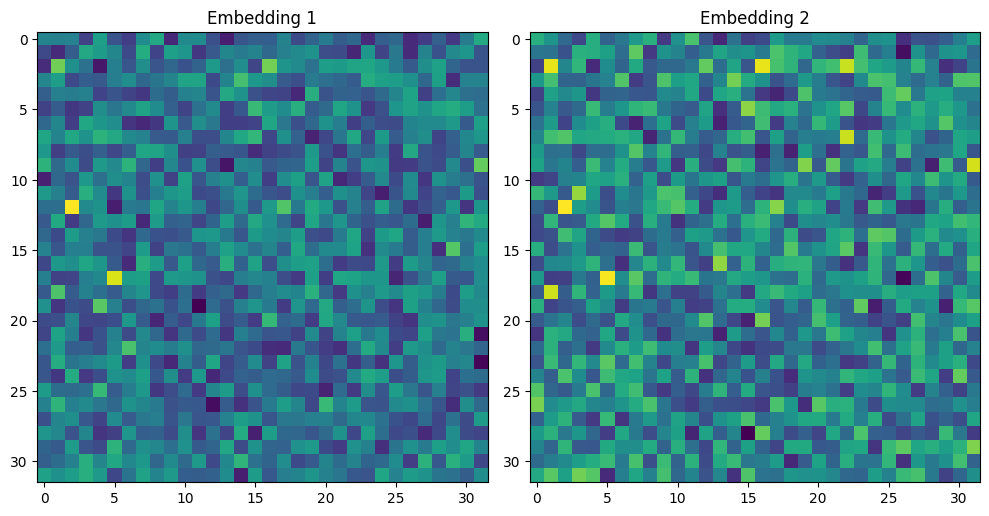

In [ ]:
# prompt: np.array(embedded_documents[0]).reshape(32,32),  np.array(embedded_documents[1]).reshape(32,32),  2 개 데이터를 한 행에 모두 시각화하라

import numpy as np
import matplotlib.pyplot as plt

# Assuming embedded_documents is defined as in the provided code

# Reshape the embeddings
arr1 = np.array(embedded_documents[0]).reshape(32, 32)
arr2 = np.array(embedded_documents[1]).reshape(32, 32)

# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first embedding
axes[0].imshow(arr1, cmap='viridis')  # Choose a suitable colormap
axes[0].set_title('Embedding 1')

# Plot the second embedding
axes[1].imshow(arr2, cmap='viridis')
axes[1].set_title('Embedding 2')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


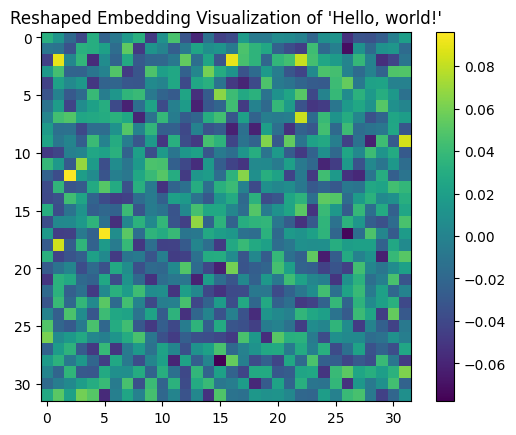

In [ ]:
reshaped_embedding = np.array(embedded_documents[1]).reshape(32, 32)

# Display the reshaped embedding as an image
plt.imshow(reshaped_embedding, cmap='viridis') # You can change the colormap if needed
plt.colorbar()
plt.title("Reshaped Embedding Visualization of 'Hello, world!'")
plt.show()